In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import RFE

# K-fold cross validation
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import VarianceThreshold

import time
# to save the models
import pickle

# to remove unnecessary warnings
import warnings

warnings.filterwarnings('ignore')

# accuracy metrics for the regression problem
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from ipynb.fs.full.ML_algorithms import decision_tree_regressor
from ipynb.fs.full.ML_algorithms import random_forest_regressor
from ipynb.fs.full.ML_algorithms import gradient_boosting_regressor
from ipynb.fs.full.ML_algorithms import linear_regressor
from ipynb.fs.full.ML_algorithms import elasticnet_regressor
from ipynb.fs.full.ML_algorithms import adaboost_regressor
from ipynb.fs.full.ML_algorithms import X_gradient_boosting_regressor

import statsmodels.api as sm

In [65]:
# df = pd.read_csv("bmw_used_cars.csv")
df = pd.read_csv("bmw.csv")
df = pd.get_dummies(df)
# df = df.drop('year', axis=1)
display(df.head())
display(df.info())
display(df.describe())

,year,price,mileage,tax,mpg,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,...,model_ i3,model_ i8,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2014,11200,67068,125,57.6,2.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,2018,27000,14827,145,42.8,2.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2016,16000,62794,160,51.4,3.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,2017,12750,26676,145,72.4,1.5,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,2014,14500,39554,160,50.4,3.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    10781 non-null  int64  
 1   price                   10781 non-null  int64  
 2   mileage                 10781 non-null  int64  
 3   tax                     10781 non-null  int64  
 4   mpg                     10781 non-null  float64
 5   engineSize              10781 non-null  float64
 6   model_ 1 Series         10781 non-null  uint8  
 7   model_ 2 Series         10781 non-null  uint8  
 8   model_ 3 Series         10781 non-null  uint8  
 9   model_ 4 Series         10781 non-null  uint8  
 10  model_ 5 Series         10781 non-null  uint8  
 11  model_ 6 Series         10781 non-null  uint8  
 12  model_ 7 Series         10781 non-null  uint8  
 13  model_ 8 Series         10781 non-null  uint8  
 14  model_ M2               10781 non-null

None

,year,price,mileage,tax,mpg,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,...,model_ i3,model_ i8,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,...,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767,0.182636,0.113997,0.226602,0.092292,...,0.003988,0.001577,0.332808,0.234394,0.432798,0.651795,0.000278,0.027641,0.003339,0.316946
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054,0.386386,0.317822,0.418653,0.289451,...,0.063031,0.039680,0.471240,0.423639,0.495486,0.476424,0.016680,0.163950,0.057692,0.465308
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
def variance_threshold_selector(data, threshold):
    """
    This function removes the features with a variance lower than the threshold
    Args:
        data (dataFrame): pandas DataFrame
        threshold (float): Features with variance lower than this threshold will be removed
    Returns:
        a dataFrame with the actual index and column names
    """
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    
    return data[data.columns[selector.get_support(indices=True)]]

In [67]:
def cv_result(model):
    """
    This function returns the grid search and cross-validation results in a DataFrame
    Args:
        model: trained model
    Returns:
        a datafrmae
    """

    # create a new dataframe from the grid search cross-validation results
    cross_val_result = pd.DataFrame(model.cv_results_)
    
    # list of columns to drop
    drop_cols = ['mean_fit_time', 'std_fit_time', 'mean_score_time', 
                 'std_score_time', 'params']

    cross_val_result = cross_val_result.drop(drop_cols, axis=1)
    cross_val_result = cross_val_result.sort_values(by='rank_test_score')
    
    # return a dataframe
    return cross_val_result

In [68]:
# df = variance_threshold_selector(df, 0.01)

# display(df.head())
# display(df.info())

In [69]:
train = df.drop('price', axis=1)
y = df[['price']]

# training size = 80%, test size = 20%
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8624, 37) (2157, 37) (8624, 1) (2157, 1)


In [75]:
# mod = sm.OLS(y_train, X_train)
# res = mod.fit()
# print(res.summary())

# y_pred = res.predict(X_test)
# MAE = mean_absolute_error(y_test, y_pred)
# RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)

# print("MAE : ", MAE, "RMSE : ", RMSE, "r2_score :", r2)

In [79]:
# model_DT = decision_tree_regressor(X_train, y_train, 
#                                    ['mse'], 
#                                    ['auto'], 
#                                    np.arange(10,11,1).tolist(),
#                                    np.arange(3,4,1).tolist(), 
#                                    'neg_root_mean_squared_error', 
#                                    5)

# model_RF = random_forest_regressor(X_train, y_train, 
#                                    ['mse'], 
#                                    np.arange(100,101,100).tolist(), 
#                                    [False],
#                                    ['auto'],
#                                    [None], 
#                                    np.arange(2,3,1).tolist(), 
#                                    'neg_root_mean_squared_error', 
#                                    5)

# model_GB = gradient_boosting_regressor(X_train, y_train, 
#                                        ['mse'],
#                                        [9], 
#                                        np.arange(100,101,100).tolist(), 
#                                        [0.1], 
#                                        'neg_root_mean_squared_error', 
#                                        5)

# ['linear', 'square', 'exponential']
model_AB = adaboost_regressor(X_train, y_train, [GradientBoostingRegressor(max_depth=5)],
                              np.arange(100,101,100).tolist(), 
                              [0.1], 
                              ['exponential'], 
                              'neg_root_mean_squared_error', 5)

time =  4.124470237890879


In [ ]:
model_DT = decision_tree_regressor(X_train, y_train, 
                                   ['mse'], 
                                   ['auto'], 
                                   np.arange(10,11,1).tolist(),
                                   np.arange(3,4,1).tolist(), 
                                   'neg_root_mean_squared_error', 
                                   5)

In [ ]:
model_RF = random_forest_regressor(X_train, y_train, 
                                   ['mse'], 
                                   np.arange(200,201,100).tolist(), 
                                   [False], 
                                   ['auto'],
                                   np.arange(10,11,1).tolist(), 
                                   np.arange(3,4,1).tolist(), 
                                   'neg_root_mean_squared_error', 
                                   5)

In [10]:
model_GB = gradient_boosting_regressor(X_train, y_train, 
                                       ['mse'],
                                       np.arange(4,5,1).tolist(), 
                                       np.arange(400,401,100).tolist(), 
                                       [0.1], 
                                       'neg_root_mean_squared_error', 
                                       5)

time =  0.0012499014536539713
time =  0.12653333346048992
time =  0.12561612129211425


In [11]:
model_XGB = X_gradient_boosting_regressor(X_train, y_train,
                                          [3,4,5], 
                                          [100,200,300], 
                                          [0.1],
                                          'neg_mean_squared_error', 5)

time =  0.17079946597417195


In [12]:
model_LR = linear_regressor(X_train, y_train, [True], [True], 'neg_root_mean_squared_error', 5)

time =  0.0008666793505350749


In [49]:
model_EN = elasticnet_regressor(X_train, y_train, 
                                np.arange(0,1.1,0.01).tolist(), 
                                [1], 
                                [True], [True], 
                                'neg_root_mean_squared_error', 5)

time =  0.11551616589228313


In [53]:
def model_output(X_test, y_test, model):
    
    print(model.best_params_)
    
    cv = cv_result(model)
    y_pred = model.predict(X_test)
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    display(cv.head())
    print("MAE : ", MAE, "RMSE : ", RMSE, "r2_score :", r2)
    
    return cv, y_pred, MAE, RMSE, r2

In [80]:
# cv_DT, y_pred_DT, MAE_DT, RMSE_DT, r2_DT = model_output(X_test, y_test, model_DT)
cv_RF, y_pred_RF, MAE_RF, RMSE_RF, r2_RF = model_output(X_test, y_test, model_RF)
cv_GB, y_pred_GB, MAE_GB, RMSE_GB, r2_GB = model_output(X_test, y_test, model_GB)
cv_LR, y_pred_LR, MAE_LR, RMSE_LR, r2_LR = model_output(X_test, y_test, model_LR)
cv_AB, y_pred_AB, MAE_AB, RMSE_AB, r2_AB = model_output(X_test, y_test, model_AB)
cv_XGB, y_pred_XGB, MAE_XGB, RMSE_XGB, r2_XGB = model_output(X_test, y_test, model_XGB)
cv_EN, y_pred_EN, MAE_EN, RMSE_EN, r2_EN = model_output(X_test, y_test, model_EN)

{'bootstrap': False, 'criterion': 'mse', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 200}


,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,False,mse,10,auto,3,200,-2775.949677,-2937.111624,-3004.67267,-3252.858548,-4157.954463,-3225.709396,490.764231,1


MAE :  2162.8383210936113 RMSE :  3383.2715290464453 r2_score : 0.9114833866798436
{'criterion': 'mse', 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 400}


,param_criterion,param_learning_rate,param_max_depth,param_n_estimators,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,mse,0.1,4,400,-2297.408625,-2245.683605,-2694.974182,-2771.265803,-3447.345398,-2691.335523,431.679755,1


MAE :  1577.0943390572534 RMSE :  2671.6593303267937 r2_score : 0.9448032839537196
{'fit_intercept': True, 'normalize': True}


,param_fit_intercept,param_normalize,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,True,True,-3954.177503,-4034.460681,-3787.789829,-4201.291697,-4805.440472,-4156.632036,350.686505,1


MAE :  2819.0815948076033 RMSE :  4258.098757405282 r2_score : 0.8597888534694309
{'base_estimator': GradientBoostingRegressor(max_depth=5), 'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}


,param_base_estimator,param_learning_rate,param_loss,param_n_estimators,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,GradientBoostingRegressor(max_depth=5),0.1,exponential,100,-2371.953012,-2373.622308,-2652.091357,-2664.853461,-3481.406952,-2708.785418,406.909977,1


MAE :  1719.4217594737142 RMSE :  2734.191021861113 r2_score : 0.9421892256058679
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


,param_learning_rate,param_max_depth,param_n_estimators,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.1,5,200,-4.612505e+06,-5.333082e+06,-5.733786e+06,-6.905442e+06,-1.171072e+07,-6.859107e+06,2.537031e+06,1
8,0.1,5,300,-4.807184e+06,-5.275725e+06,-5.654476e+06,-7.013447e+06,-1.155981e+07,-6.862129e+06,2.461261e+06,2
5,0.1,4,300,-5.221078e+06,-5.372947e+06,-5.926305e+06,-6.998432e+06,-1.189842e+07,-7.083437e+06,2.486942e+06,3
4,0.1,4,200,-4.694814e+06,-5.677855e+06,-6.074971e+06,-7.019284e+06,-1.218743e+07,-7.130870e+06,2.635973e+06,4
6,0.1,5,100,-4.834005e+06,-5.805446e+06,-6.203094e+06,-7.395778e+06,-1.223250e+07,-7.294166e+06,2.602177e+06,5


MAE :  1610.379722428974 RMSE :  2748.5342101379515 r2_score : 0.9415811000395473
{'alpha': 0.01, 'fit_intercept': True, 'l1_ratio': 1, 'normalize': True}


,param_alpha,param_fit_intercept,param_l1_ratio,param_normalize,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.01,True,1,True,-3953.711980,-4032.328466,-3791.978086,-4201.106603,-4801.067141,-4156.038455,348.388651,1
0,0,True,1,True,-3954.022883,-4032.188627,-3792.181253,-4201.021171,-4800.891585,-4156.061104,348.252821,2
2,0.02,True,1,True,-3953.423572,-4032.613744,-3791.894349,-4201.172886,-4801.266754,-4156.074261,348.495064,3
3,0.03,True,1,True,-3953.148344,-4032.850644,-3791.789397,-4201.269359,-4801.463319,-4156.104213,348.607538,4
4,0.04,True,1,True,-3952.890871,-4033.101252,-3791.697619,-4201.385154,-4801.676493,-4156.150278,348.720942,5


MAE :  2822.617676561045 RMSE :  4258.3110883550435 r2_score : 0.8597748698068253


In [31]:
y_test['DT'] = y_pred_DT
y_test['RF'] = y_pred_RF
y_test['GB'] = y_pred_GB
y_test['LR'] = y_pred_LR
y_test['AB'] = y_pred_AB
y_test['XGB'] = y_pred_XGB
y_test['EN'] = y_pred_EN

In [32]:
y_test

,price,DT,RF,GB,LR,AB,XGB,EN
8728,15300,14895.600000,14895.600000,15176.832137,16144.0,16299.425715,14227.367188,22663.100609
761,15495,13004.151685,13004.151685,13434.847189,15008.0,12396.939772,13404.447266,22666.819686
7209,39875,42362.622642,42362.622642,41514.490993,37624.0,51548.739919,42683.140625,22676.500758
6685,21730,21552.772727,21552.772727,21121.447746,22680.0,22501.905192,21187.177734,22670.542217
8548,13799,17852.115385,17852.115385,16465.367806,16968.0,16973.267937,17096.453125,22665.390204
...,...,...,...,...,...,...,...,...
10677,12000,12402.000000,12402.000000,13131.409540,13888.0,11766.826795,12833.641602,22662.128031
8418,11759,10287.472727,10287.472727,10952.778253,9248.0,11766.826795,10444.462891,22658.667485
1702,21460,23591.625000,23591.625000,23309.121620,21816.0,28339.105572,22472.830078,22667.644675
6965,52991,50377.000000,50377.000000,49156.878549,49340.0,28339.105572,48078.246094,22677.339687


In [25]:
OUT = pd.DataFrame({'actual':np.squeeze(y_test.values), 
                    'DT':y_pred_DT, 
                    'RF':y_pred_RF, 
                    'GB':y_pred_GB,
                    'LR':np.squeeze(y_pred_LR),
                    'AB':y_pred_AB,
                    'XGB':y_pred_XGB,
                    'EN':y_pred_EN})
OUT = OUT.round(2)
display(OUT)

,actual,DT,RF,GB,LR,AB,XGB,EN
0,15300,14895.60,14895.60,15176.83,16144.0,16299.43,14227.370117,22663.10
1,15495,13004.15,13004.15,13434.85,15008.0,12396.94,13404.450195,22666.82
2,39875,42362.62,42362.62,41514.49,37624.0,51548.74,42683.140625,22676.50
3,21730,21552.77,21552.77,21121.45,22680.0,22501.91,21187.179688,22670.54
4,13799,17852.12,17852.12,16465.37,16968.0,16973.27,17096.449219,22665.39
...,...,...,...,...,...,...,...,...
2152,12000,12402.00,12402.00,13131.41,13888.0,11766.83,12833.639648,22662.13
2153,11759,10287.47,10287.47,10952.78,9248.0,11766.83,10444.459961,22658.67
2154,21460,23591.62,23591.62,23309.12,21816.0,28339.11,22472.830078,22667.64
2155,52991,50377.00,50377.00,49156.88,49340.0,28339.11,48078.238281,22677.34


In [83]:
# to generate clear images
sns.set_context('talk')

# set the background of the images
sns.set_style('darkgrid')

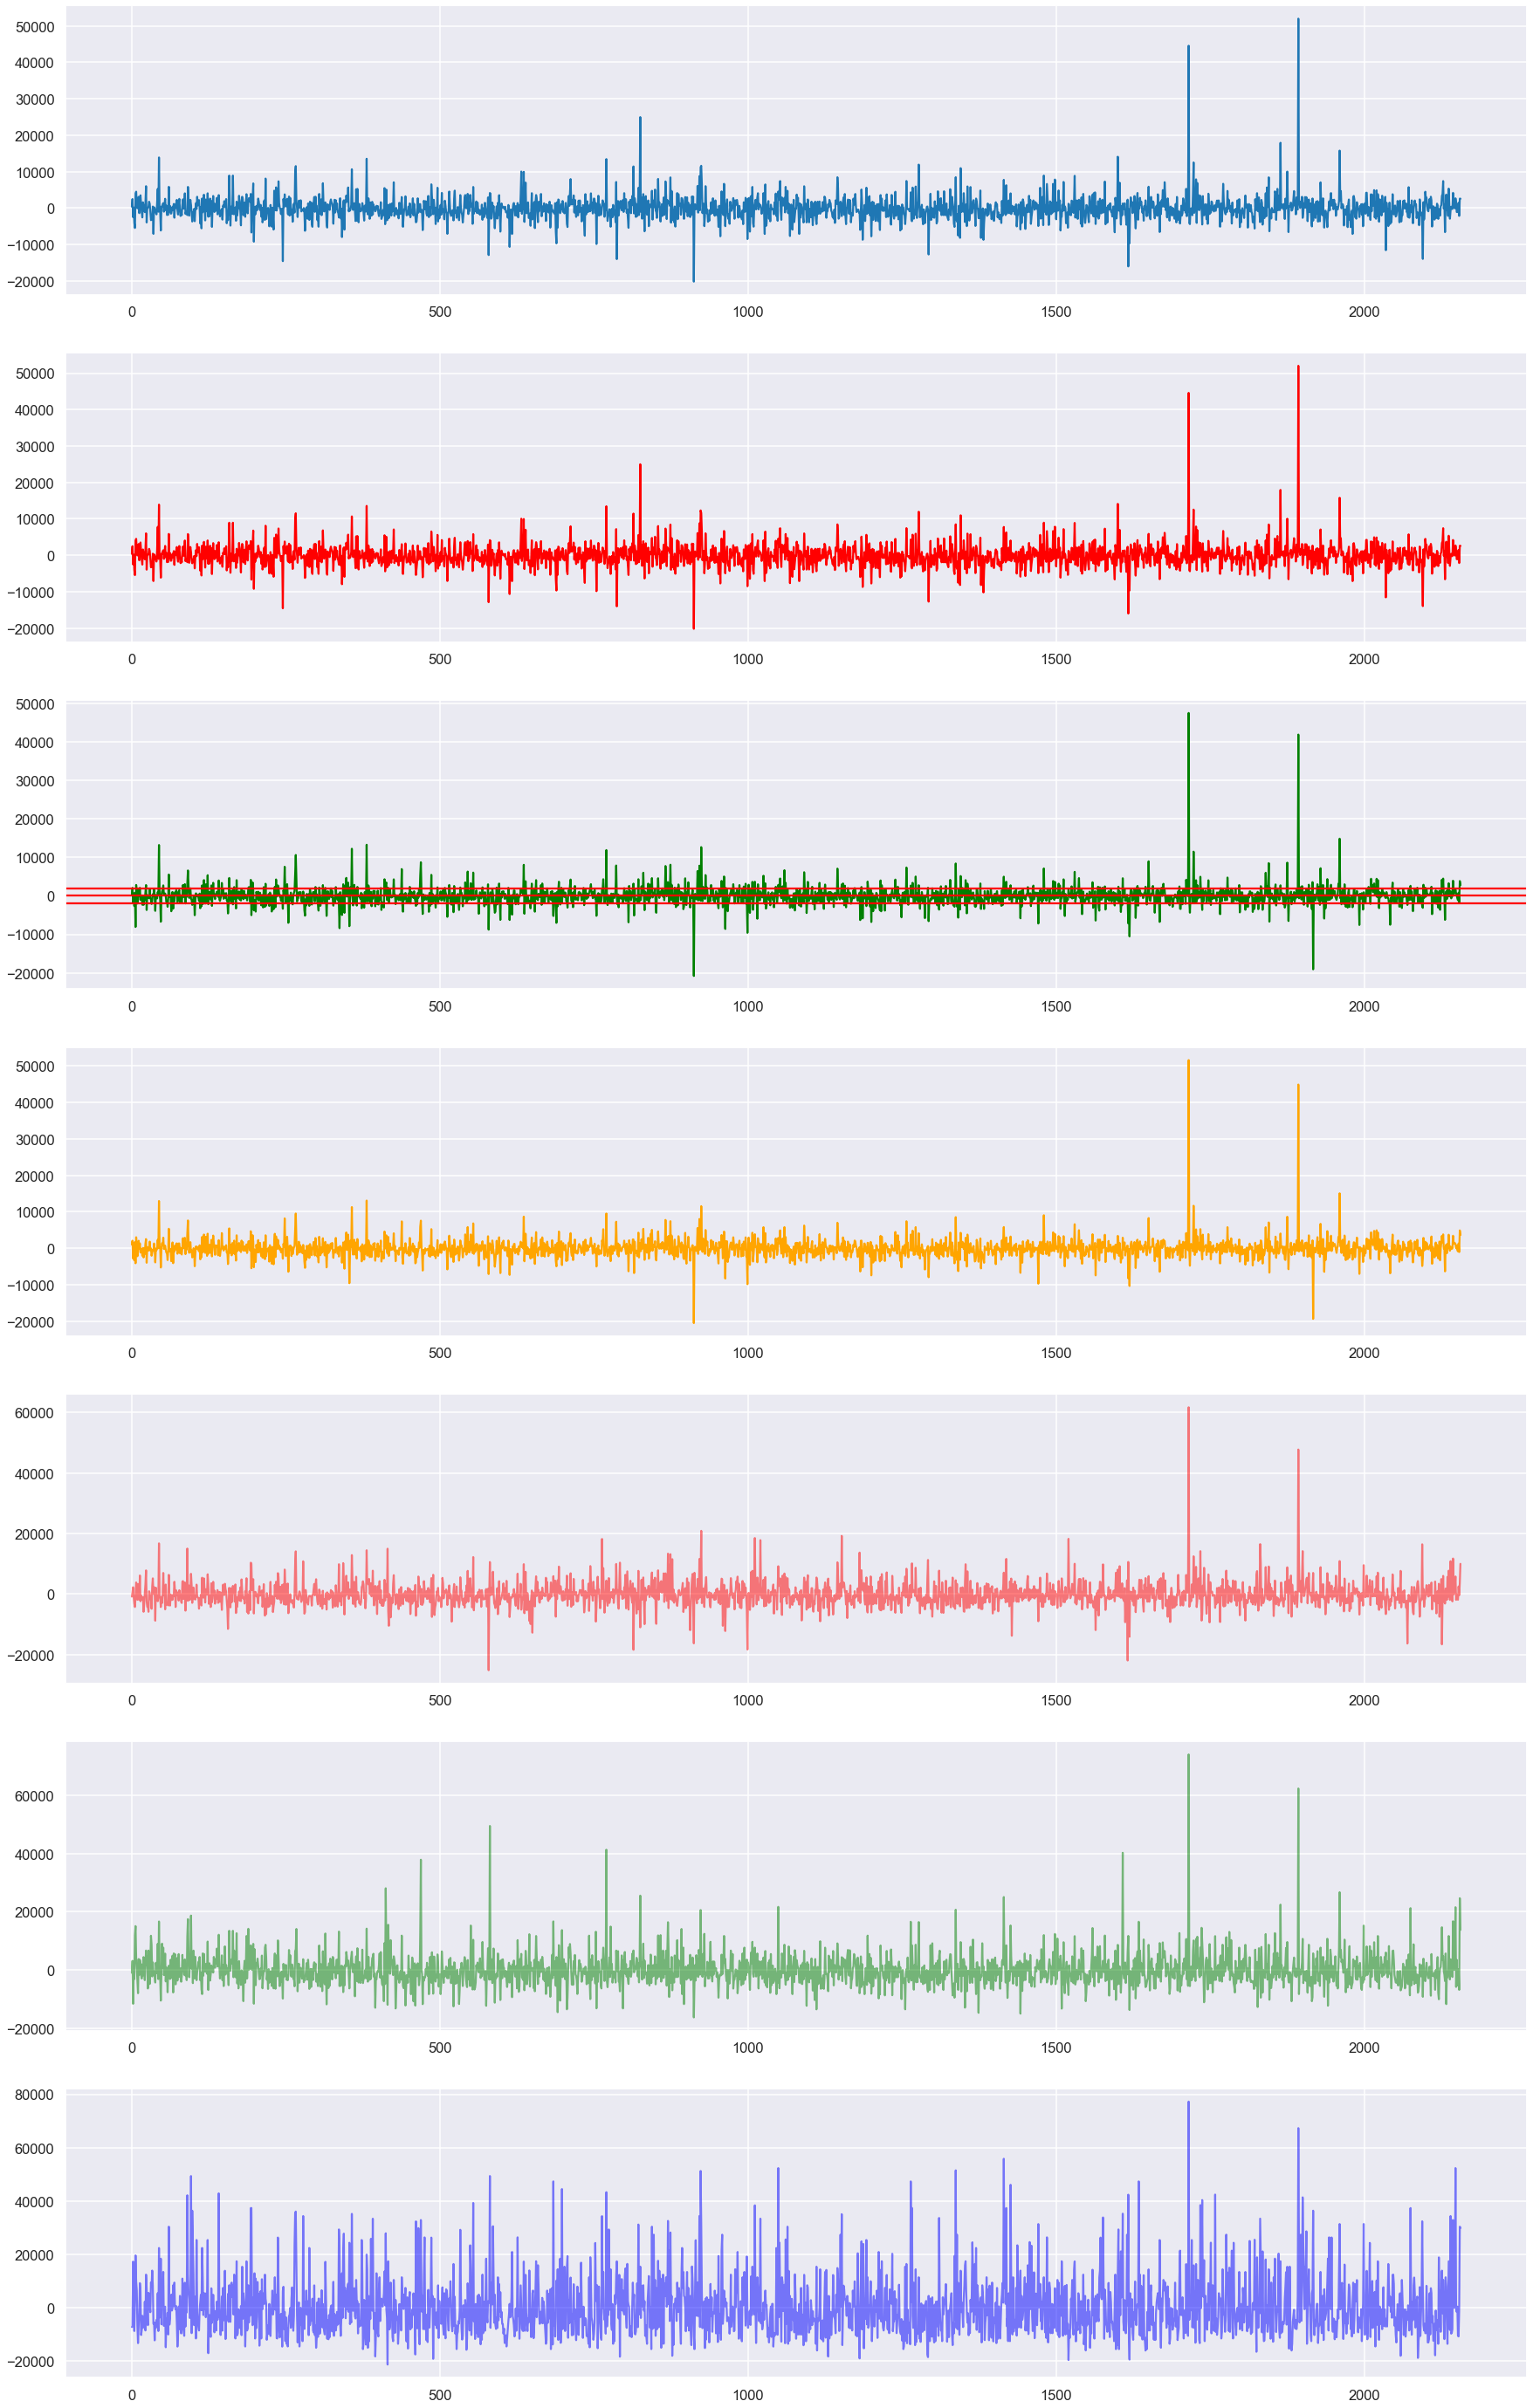

In [90]:
plt.figure(figsize=(30,50))

plt.subplot(7,1,1)
plt.plot(OUT.index, OUT.actual-OUT.DT)

plt.subplot(7,1,2)
plt.plot(OUT.index, OUT.actual-OUT.RF, color='red')

plt.subplot(7,1,3)
plt.plot(OUT.index, OUT.actual-OUT.GB, color='green')
plt.axhline(y=0, color='r', linestyle='-')
plt.axhline(y=2000, color='r', linestyle='-')
plt.axhline(y=-2000, color='r', linestyle='-')

plt.subplot(7,1,4)
plt.plot(OUT.index, OUT.actual-OUT.XGB, color='orange')

plt.subplot(7,1,5)
plt.plot(OUT.index, OUT.actual-OUT.LR, color='red', alpha=0.5)

plt.subplot(7,1,6)
plt.plot(OUT.index, OUT.actual-OUT.AB, color='green', alpha=0.5)

plt.subplot(7,1,7)
plt.plot(OUT.index, OUT.actual-OUT.EN, color='blue', alpha=0.5)
# plt.plot(OUT.index, OUT.GB)